In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data/SIATA/28.csv')

In [4]:
# # Replace the first column name
# df.columns.values[0] = 'Fecha_Hora'

In [5]:
df.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [6]:
# Drop the codigoSerial column
df.drop('codigoSerial', axis=1, inplace=True)

In [7]:
# Replace -9999 with NaN
df.replace(-9999, pd.NA, inplace=True)

In [8]:
# Get the percentage of missing values by column
missing_values = df.isnull().mean() * 100

In [9]:
# Drop columns with more than 10% missing values
columns_to_drop = missing_values[missing_values > 10].index

df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
# There are two types of columns: those with measurements and those with values for the quality of the measurements.
# The columns with values for the quality of the measurements have the same name as the columns with the measurements, but with the prefix 'calidad_'.
# If the dataset has only the columns with the quality of the measurements, but not the columns with the measurements, then the columns with the quality of the measurements are dropped.

# Get the columns with measurements
columns_with_measurements = df.columns[~df.columns.str.startswith('calidad_')]

# Get the columns with the quality of the measurements
columns_with_quality = df.columns[df.columns.str.startswith('calidad_')]

# Find the columns with quality of the measurements that have a corresponding column with measurements
columns_with_quality_and_measurements = columns_with_quality.str.replace('calidad_', '').isin(columns_with_measurements)

# Drop the columns with the quality of the measurements that do not have a corresponding column with measurements
columns_with_quality_to_drop = columns_with_quality[~columns_with_quality_and_measurements]

df.drop(columns_with_quality_to_drop, axis=1, inplace=True)

In [11]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [12]:
df.isna().sum()

Fecha_Hora                0
pm25                    656
calidad_pm25             12
no                     1750
calidad_no               12
no2                    1750
calidad_no2              12
nox                    1750
calidad_nox              12
dviento_ssr            2429
calidad_dviento_ssr      12
haire10_ssr            2362
calidad_haire10_ssr      12
p_ssr                  2362
calidad_p_ssr            12
rglobal_ssr            2434
calidad_rglobal_ssr      12
taire10_ssr            2362
calidad_taire10_ssr      12
vviento_ssr            2363
calidad_vviento_ssr      12
dtype: int64

In [13]:
df

,Fecha_Hora,pm25,calidad_pm25,no,calidad_no,no2,calidad_no2,nox,calidad_nox,dviento_ssr,...,haire10_ssr,calidad_haire10_ssr,p_ssr,calidad_p_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2018-01-01 00:00:00,42.0,1.0,22.8438,1.0,16.5963,1.0,39.4463,1.0,6.92989,...,74.9315,1.0,637.431,1.0,0.0,1.0,19.171,1.0,0.560345,1.0
1,2018-01-01 01:00:00,38.0,1.0,2.6975,1.0,13.4904,1.0,16.189,1.0,323.503,...,77.5025,1.0,636.948,1.0,0.0,1.0,18.6489,1.0,1.20548,1.0
2,2018-01-01 02:00:00,53.0,1.0,4.72986,1.0,15.2611,1.0,19.9911,1.0,331.834,...,78.9618,1.0,636.518,1.0,0.0,1.0,18.2408,1.0,1.11856,1.0
3,2018-01-01 03:00:00,38.0,1.0,3.08167,1.0,13.7399,1.0,16.8242,1.0,324.642,...,79.5796,1.0,636.347,1.0,0.0,1.0,17.8762,1.0,0.721186,1.0
4,2018-01-01 04:00:00,47.0,1.0,5.62889,1.0,15.2401,1.0,20.8768,1.0,1.63179,...,79.2826,1.0,636.0,1.0,0.0,1.0,17.8206,1.0,0.122182,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,2025-01-31 19:00:00,11.0,1.0,2.9547,1.0,16.8103,1.0,19.765,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62108,2025-01-31 20:00:00,13.0,1.0,4.057,2.6,19.625,2.6,23.6821,2.6,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62109,2025-01-31 21:00:00,22.0,1.0,5.3826,1.0,20.8798,1.0,26.2625,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62110,2025-01-31 22:00:00,40.0,1.0,3.1054,1.0,14.8933,1.0,17.9987,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31


In [14]:
# If calidad_pm25 is greater than 4, the value of pm25 is set to NaN.
df.loc[df['calidad_pm25'] > 4, 'pm25'] = pd.NA
df.loc[df['calidad_no'] > 4, 'no'] = pd.NA
df.loc[df['calidad_no2'] > 4, 'no2'] = pd.NA
df.loc[df['calidad_nox'] > 4, 'nox'] = pd.NA
df.loc[df['calidad_dviento_ssr'] > 4, 'dviento_ssr'] = pd.NA
df.loc[df['calidad_haire10_ssr'] > 4, 'haire10_ssr'] = pd.NA
df.loc[df['calidad_p_ssr'] > 4, 'p_ssr'] = pd.NA
df.loc[df['calidad_rglobal_ssr'] > 4, 'rglobal_ssr'] = pd.NA
df.loc[df['calidad_taire10_ssr'] > 4, 'taire10_ssr'] = pd.NA
df.loc[df['calidad_vviento_ssr'] > 4, 'vviento_ssr'] = pd.NA

In [27]:
df_pm25=df[['Fecha_Hora','pm25', 'calidad_pm25']]

In [28]:
df_pm25['calidad_pm25'].value_counts(normalize=True)

calidad_pm25
1.0       0.944283
2.3       0.013333
3.1       0.010515
4.31      0.010354
2.1       0.006731
4.2985    0.006103
2.2       0.004444
3.0       0.001771
2.5       0.001111
2.0       0.000773
2.4       0.000306
3.2       0.000242
4.1964    0.000016
4.1989    0.000016
Name: proportion, dtype: float64

In [29]:
# Calculate the daily average value for pm25 if for the same day there are at least 75% of the hourly values.
df_pm25['Fecha_Hora'] = pd.to_datetime(df_pm25['Fecha_Hora'])
df_pm25.set_index('Fecha_Hora', inplace=True)
# Resample to daily frequency and count number of measurements per day
daily_counts = df_pm25['pm25'].resample('D').count()

# Calculate daily means only for days with at least 75% of measurements (18 hours)
df_pm25_daily = df_pm25['pm25'].resample('D').mean()
df_pm25_daily = df_pm25_daily[daily_counts >= 18]

# Fill the missing dates with a null value
df_pm25_daily = df_pm25_daily.asfreq(freq='D')

/tmp/ipykernel_6677/3776745353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['Fecha_Hora'] = pd.to_datetime(df_pm25['Fecha_Hora'])


In [36]:
df_pm25_daily.shape

(2588,)

In [ ]:
df_pm25_daily

Fecha_Hora
2018-01-01    24
2018-01-02    24
2018-01-03    24
2018-01-04    24
2018-01-05    23
              ..
2025-01-27    24
2025-01-28    11
2025-01-29    10
2025-01-30    24
2025-01-31    24
Freq: D, Name: pm25, Length: 2588, dtype: int64

In [41]:
df_pm25_daily.describe()

count     2549.000
unique     983.000
top         15.875
freq        11.000
Name: pm25, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

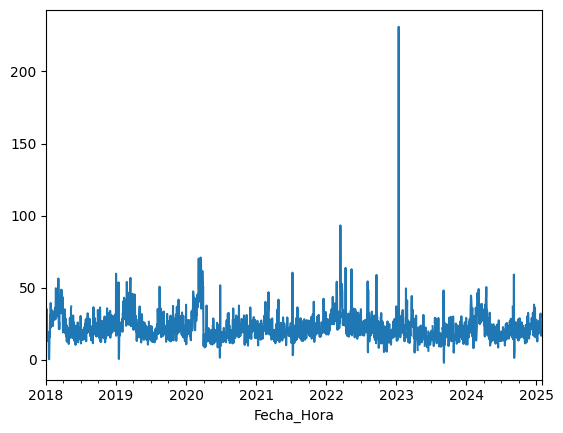

In [32]:
df_pm25_daily.plot()
plt.show

In [35]:
# Find the max value of df_pm25 and its index
max_value = df_pm25_daily.max()
max_index = df_pm25_daily.idxmax()
print(f'The maximum value of pm25 is {max_value} and it was measured on {max_index}')

The maximum value of pm25 is 230.95 and it was measured on 2023-01-14 00:00:00


In [38]:
# Calculate the daily average value of PM2.5
df_pm25_for_avg = df_pm25[['Fecha_Hora', 'pm25']]
df_pm25_for_avg['Fecha_Hora'] = pd.to_datetime(df_pm25_for_avg['Fecha_Hora'])
df_pm25_for_avg['Fecha'] = df_pm25_for_avg['Fecha_Hora'].dt.date
df_pm25_for_avg['Hora'] = df_pm25_for_avg['Fecha_Hora'].dt.time

df_pm25_for_avg = df_pm25_for_avg.groupby('Fecha')['pm25'].mean()

C:\Users\MDELAROSA\AppData\Local\Temp\ipykernel_33628\663587430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25_for_avg['Fecha_Hora'] = pd.to_datetime(df_pm25_for_avg['Fecha_Hora'])
C:\Users\MDELAROSA\AppData\Local\Temp\ipykernel_33628\663587430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25_for_avg['Fecha'] = df_pm25_for_avg['Fecha_Hora'].dt.date


In [40]:
df_pm25_for_avg.head()

Fecha
2023-11-01    23.958333
2023-11-02    20.708333
2023-11-03    22.041667
2023-11-04    20.375000
2023-11-05    18.541667
Name: pm25, dtype: float64

In [45]:
# Ensure 'Fecha_Hora' is in datetime format
df_pm25_for_avg['Fecha_Hora'] = pd.to_datetime(df_pm25_for_avg['Fecha_Hora'])

# Set 'Fecha_Hora' as the index
df_pm25_for_avg.set_index('Fecha_Hora', inplace=True)

# Filter data between 2023-12-01 and 2024-04-01
df_pm25_for_avg = df_pm25_for_avg.loc['2023-12-01':'2024-04-01']

TypeError: '<' not supported between instances of 'datetime.date' and 'str'

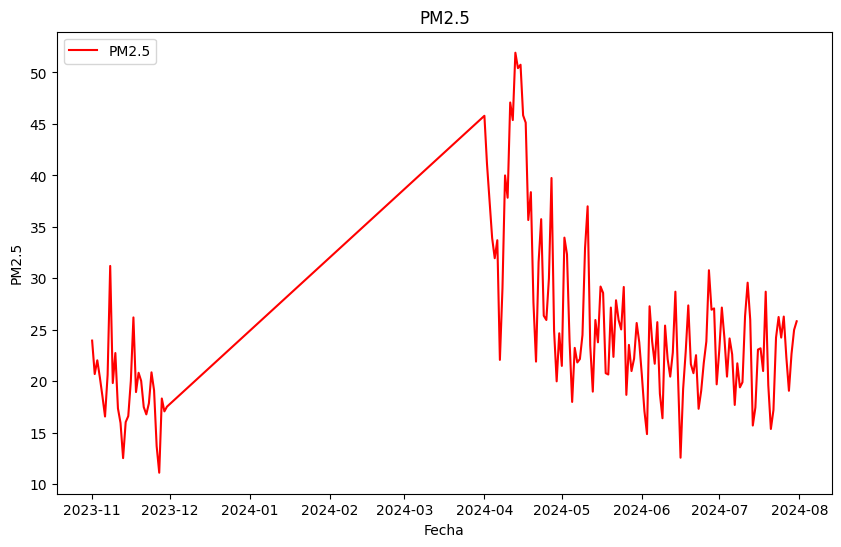

In [41]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(df_pm25_for_avg.index, df_pm25_for_avg.values, label='PM2.5', color='red')
plt.title('PM2.5')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Summarize the data
df.describe()

,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
count,3648.0,3648.000000,3648.000000,3648.000000,3648.000000,3648.0,3648.0,3648.000000,3648.000000,3648.000000,...,3648.000000,3648.0,3648.000000,3648.0,3648.0,3648.0,3648.000000,3648.0,3648.000000,3648.0
mean,12.0,6.670641,1.127372,-145.703947,1.616458,-9999.0,1.0,-248.609087,1.358029,-248.884853,...,-1459.976804,1.0,-1973.388265,1.0,-9999.0,1.0,-1954.476139,1.0,-1973.170914,1.0
std,0.0,503.827617,0.469308,1781.730202,1.208783,0.0,0.0,1628.923420,0.807732,1628.707596,...,4234.964904,0.0,3980.323707,0.0,0.0,0.0,3989.704628,0.0,3980.431485,0.0
min,12.0,-9999.000000,1.000000,-9999.000000,1.000000,-9999.0,1.0,-9999.000000,1.000000,-9999.000000,...,-9999.000000,1.0,-9999.000000,1.0,-9999.0,1.0,-9999.000000,1.0,-9999.000000,1.0
25%,12.0,17.000000,1.000000,32.000000,1.000000,-9999.0,1.0,5.012875,1.000000,15.049425,...,637.749750,1.0,0.000000,1.0,-9999.0,1.0,19.152250,1.0,0.081000,1.0
50%,12.0,24.000000,1.000000,44.000000,1.000000,-9999.0,1.0,15.215150,1.000000,20.985300,...,639.684000,1.0,0.000000,1.0,-9999.0,1.0,21.597500,1.0,0.276500,1.0
75%,12.0,32.000000,1.000000,62.000000,1.000000,-9999.0,1.0,30.821475,1.000000,28.690700,...,640.794500,1.0,0.000000,1.0,-9999.0,1.0,25.354750,1.0,0.497000,1.0
max,12.0,985.000000,4.310000,995.000000,4.310000,-9999.0,1.0,198.275000,4.310000,77.454800,...,643.539000,1.0,8.420000,1.0,-9999.0,1.0,34.393000,1.0,1.683000,1.0


In [14]:
# Percentage of data with 'pm25' = -9999
(df['pm25'] == -9999).sum() / len(df) * 100

np.float64(0.24671052631578946)

In [9]:
# Group data by 'calidad_pm25', count the number of records and show as percentage of total
df_grouped=df.groupby('calidad_pm25').size().reset_index(name='counts')

df_grouped['percentage'] = df_grouped['counts']/df_grouped['counts'].sum()*100

In [10]:
df_grouped

,calidad_pm25,counts,percentage
0,1.0000,3352,91.885965
1,2.1000,121,3.316886
2,2.2000,8,0.219298
3,2.3000,29,0.794956
4,2.4000,1,0.027412
5,2.6000,88,2.412281
6,3.0000,6,0.164474
7,3.1000,9,0.246711
8,3.2000,1,0.027412
9,4.2985,24,0.657895
